In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_path = '/home/viktor/Projects/Data/MagistracyDeploma/'
test_path = data_path + 'crowd_test/'
raw_crowd_test_path = test_path + 'raw_crowd_test.tsv'
raw_crowd_test = pd.read_csv(raw_crowd_test_path ,sep='\t')
raw_crowd_test

,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id
0,9e9961c53ca6eeb440b217e539fbf46c,wavs/9e9961c53ca6eeb440b217e539fbf46c.wav,5.82000,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,я слушаю,neutral,4282ddc30d71ef420e202e0c60391e9f
1,0166f65a30354db8282682b1a280e64c,wavs/0166f65a30354db8282682b1a280e64c.wav,3.70000,sad,NaN,858305a5450b7bd1288ba0053b1cd1c1,каким стал сбер,neutral,d70dc98ed56e9362eaefefb7b2827c8f
2,d49a6b560155831725a7bdc7d0a96099,wavs/d49a6b560155831725a7bdc7d0a96099.wav,4.38000,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,где родился шерлок холмс,neutral,0ee35d2abecf4272ecc8e1539b0839d8
3,c6852b0925797612d7b6724da8cbe7b4,wavs/c6852b0925797612d7b6724da8cbe7b4.wav,8.58000,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,открой в браузере ennio morricone,neutral,0855e363c1787df1592f58f7a27ebe13
4,0166f65a30354db8282682b1a280e64c,wavs/0166f65a30354db8282682b1a280e64c.wav,3.70000,sad,NaN,a5562e26cd8f1949488a2d1e1e549d97,каким стал сбер,neutral,d70dc98ed56e9362eaefefb7b2827c8f
...,...,...,...,...,...,...,...,...,...
79083,6c0dddce6a86f7fe9c017c03a299773e,wavs/6c0dddce6a86f7fe9c017c03a299773e.wav,4.92000,sad,3.0,f37940680d604692ea541b439fa39762,NaN,NaN,NaN
79084,d893d560e540c0c34de1ec9a779bde67,wavs/d893d560e540c0c34de1ec9a779bde67.wav,3.86000,neutral,2.0,3f2111910c469da2869d8f4178c4a945,NaN,NaN,NaN
79085,99baaf6ed01355a799311d49121e0a0f,wavs/99baaf6ed01355a799311d49121e0a0f.wav,7.24425,sad,3.0,b9413991d11e08bb636c1ce2aeedb1c2,NaN,NaN,NaN
79086,aca882b01aa79b7a75bd2e8acb2373f9,wavs/aca882b01aa79b7a75bd2e8acb2373f9.wav,4.92000,sad,3.0,0f138ca8a0ce058f48d47cda85753439,NaN,NaN,NaN


In [4]:
raw_crowd_test['annotator_emo'].value_counts(dropna=False)


annotator_emo
neutral     48917
sad         17603
angry        5987
positive     5775
other         806
Name: count, dtype: int64

In [5]:
annotator_emo_duration = raw_crowd_test[['annotator_emo', 'duration']].groupby(by='annotator_emo').mean()
annotator_emo_duration

,duration
annotator_emo,
angry,4.713925
neutral,4.659619
other,4.088483
positive,4.603514
sad,4.986755


<BarContainer object of 5 artists>

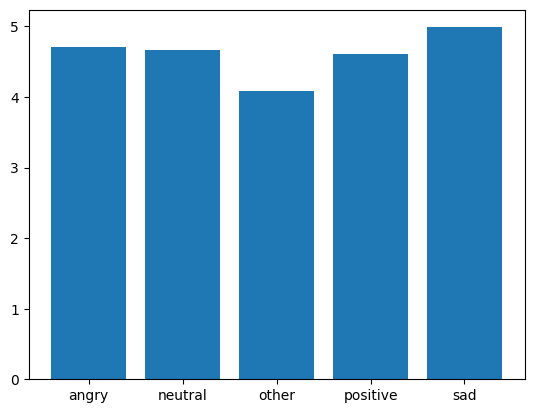

In [6]:
plt.bar(annotator_emo_duration.index, annotator_emo_duration['duration']) 


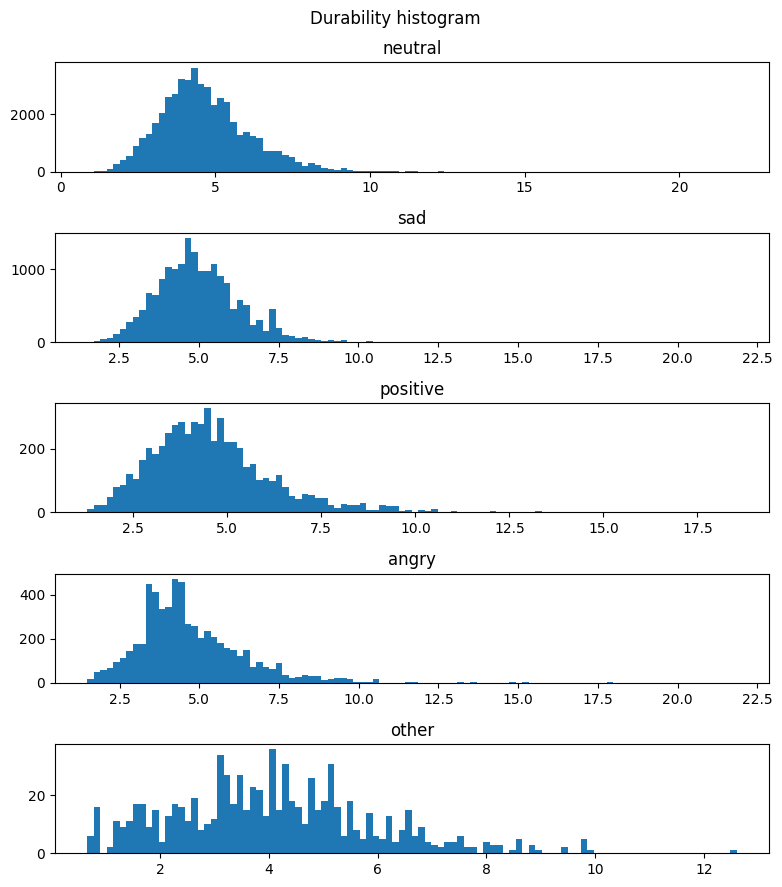

In [7]:
emotions = raw_crowd_test['annotator_emo'].unique()
bins_number = 100
# plt.hist()
fig, axs = plt.subplots(len(emotions), figsize=(8,9))
fig.suptitle('Durability histogram')
fig.tight_layout()
for i in range(len(emotions)):
    fig.tight_layout()
    axs[i].hist(raw_crowd_test[raw_crowd_test['annotator_emo'] == emotions[i]]['duration'], bins=bins_number)
    axs[i].set_title(emotions[i])
    # axs[i].plot(x, -y)
# plt.hist(raw_crowd_test[raw_crowd_test['annotator_emo'] == emotions[1]]['duration'], bins=bins_number)
None

In [8]:
np.NaN is not np.NaN

False

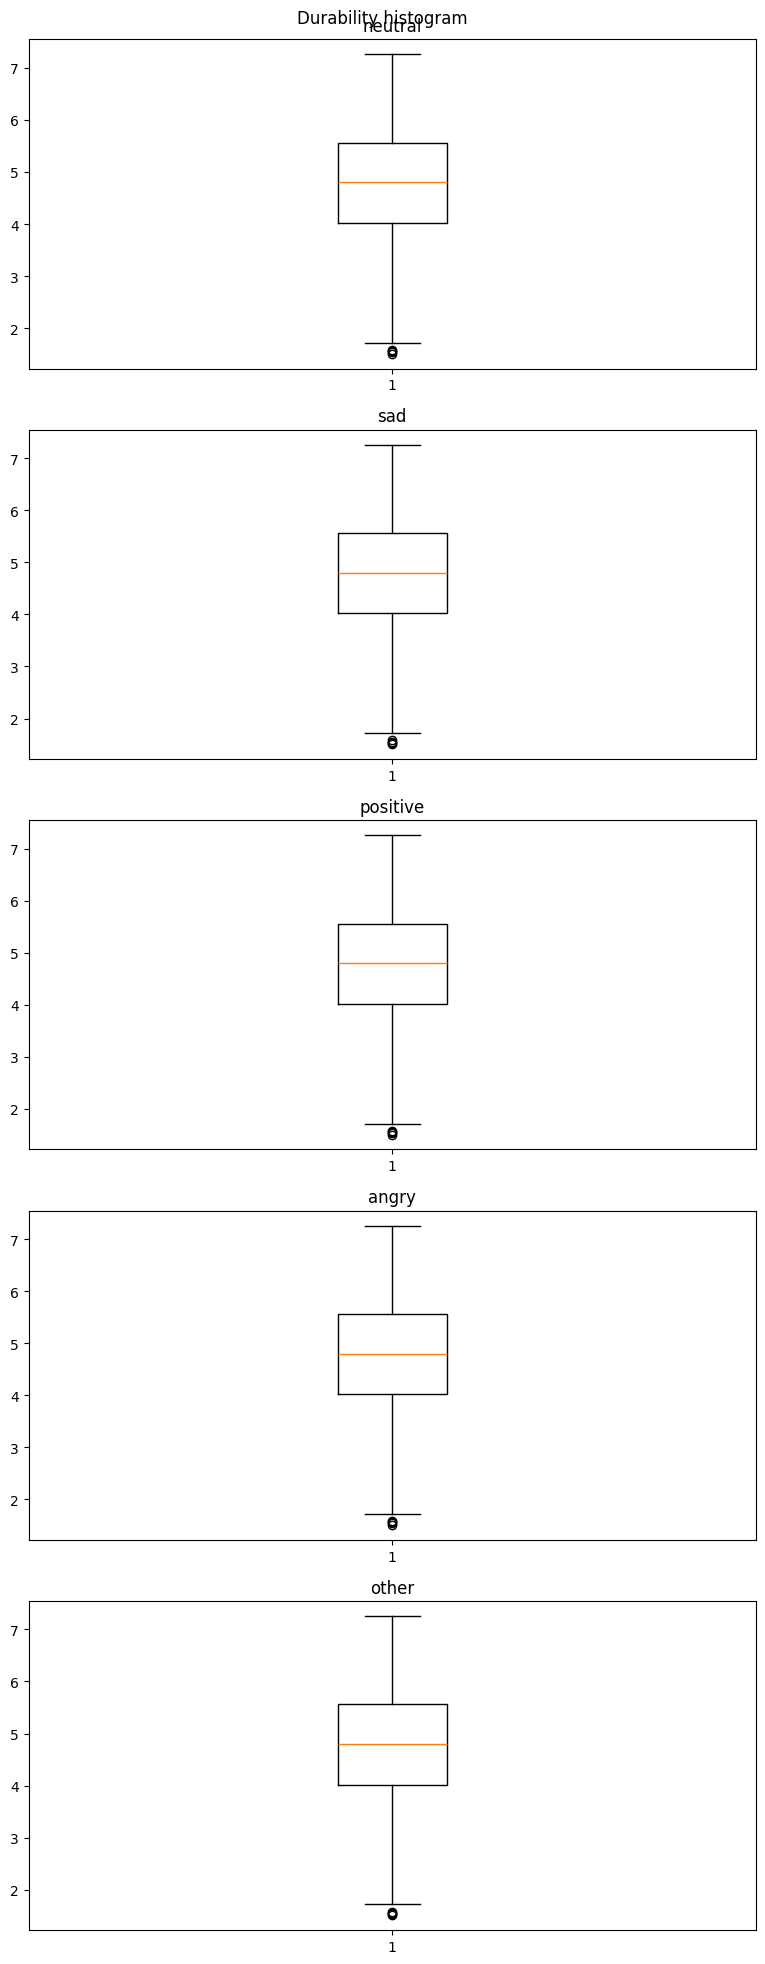

In [9]:
fig, axs = plt.subplots(len(emotions), figsize=(8,20))
fig.suptitle('Durability histogram')
fig.tight_layout()
for i in range(len(emotions)):
    data = raw_crowd_test[raw_crowd_test['annotator_emo'] == emotions[1]]['duration']
    q = data.quantile(0.95)
    data = data[data < q]
    fig.tight_layout()
    axs[i].boxplot(data)
    axs[i].set_title(emotions[i])

У аудио с эмоцией грусти нет хвоста (очень мало длинных длинных высказываний), однако грустные аудио в среднем самые длинные
У позитивных аудио самый большой хвост.

In [11]:
# bins_number = 5
# # plt.hist()
# fig, axs = plt.subplots(len(emotions), figsize=(8,9))
# fig.suptitle('Durability histogram')
# fig.tight_layout()
# for i in range(len(emotions)):
#     fig.tight_layout()
#     data = raw_crowd_test[raw_crowd_test['annotator_emo'] == emotions[i]]['speaker_text']
#     data = data[data.notna()]
#     display(data.isna().sum())
#     data.apply(len)
#     axs[i].hist((data), bins=bins_number)
#     axs[i].set_title(emotions[i])